In [1]:
import primer3
import pandas as pd
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.Restriction import *
from primers import create
from primers import score
from Bio.SeqUtils import gc_fraction
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqUtils import MeltingTemp as mt
from functions import *

In [2]:
seq = Seq("CATCATAACGGTTCTGGCAAATATTCTGAAATGAGCTGTTGACAATTAATCATCGGCTCGTATAATGTGTGGAATTGTGAGCGGATAACAATTTCACACAGGAGATATCATATGAAGCTTCTCGAGAATTCCCGGGTACCAGATCTGTCGACTACAAGGACGATGACGACAAGTGAAGATCGATCTCTCGATCGAGTGAGAGAAGATTTTCAGCCTGATACAGATTAAATCAGAACGCAGAAGCGGTCTGATAAAACAGAATTTGCCTGGCGGCAGTAGCGCGGTGGTCCCACCTGACCCCATGCCGAACTCAGAAGTGAAACGCCGTAGCGCCGATGGTAGTGTGGGGTCTCCCCATGCGAGAGTAGGGAACTGCCAGGCATCAAATAAAACGAAAGGCTCAGTCGAAAGACTGGGCCTTTCGTTTTATCTGTTGTTTGTCGGTGAACGCTCTCCTGAGTAGGACAAATCCGCCGGGAGCGGATTTGAACGTTGCGAAGCAACGGCCCGGAGGGTGGCGGGCAGGACGCCCGCCATAAACTGCCAGGCATCAAATTAAGCAGAAGGCCATCCTGACGGATGGCCTTTTTGCGTTTCTACAAACTCTTTTGTTTATTTTTCTAAATACATTCAAATATGTATCCGCTCATGAGACAATAACCCTGATAAATGCTTCAATAATATTGAAAAAGGAAGAGTATGAGTATTCAACATTTCCGTGTCGCCCTTATTCCCTTTTTTGCGGCATTTTGCCTTCCTGTTTTTGCTCACCCAGAAACGCTGGTGAAAGTAAAAGATGCTGAAGATCAGTTGGGTGCACGAGTGGGTTACATCGAACTGGATCTCAACAGCGGTAAGATCCTTGAGAGTTTTCGCCCCGAAGAACGTTTTCCAATGATGAGCACTTTTAAAGTTCTGCTATGTGGCGCGGTATTATCCCGTGTTGACGCCGGGCAAGAGCAACTCGGTCGCCGCATACACTATTCTCAGAATGACTTGGTTGAGTACTCACCAGTCACAGAAAAGCATCTTACGGATGGCATGACAGTAAGAGAATTATGCAGTGCTGCCATAACCATGAGTGATAACACTGCGGCCAACTTACTTCTGACAACGATCGGAGGACCGAAGGAGCTAACCGCTTTTTTGCACAACATGGGGGATCATGTAACTCGCCTTGATCGTTGGGAACCGGAGCTGAATGAAGCCATACCAAACGACGAGCGTGACACCACGATGCCTGTAGCAATGGCAACAACGTTGCGCAAACTATTAACTGGCGAACTACTTACTCTAGCTTCCCGGCAACAATTAATAGACTGGATGGAGGCGGATAAAGTTGCAGGACCACTTCTGCGCTCGGCCCTTCCGGCTGGCTGGTTTATTGCTGATAAATCTGGAGCCGGTGAGCGTGGGTCTCGCGGTATCATTGCAGCACTGGGGCCAGATGGTAAGCCCTCCCGTATCGTAGTTATCTACACGACGGGGAGTCAGGCAACTATGGATGAACGAAATAGACAGATCGCTGAGATAGGTGCCTCACTGATTAAGCATTGGTAACTGTCAGACCAAGTTTACTCATATATACTTTAGATTGATTTAAAACTTCATTTTTAATTTAAAAGGATCTAGGTGAAGATCCTTTTTGATAATCTCATGACCAAAATCCCTTAACGTGAGTTTTCGTTCCACTGAGCGTCAGACCCCGTAGAAAAGATCAAAGGATCTTCTTGAGATCCTTTTTTTCTGCGCGTAATCTGCTGCTTGCAAACAAAAAAACCACCGCTACCAGCGGTGGTTTGTTTGCCGGATCAAGAGCTACCAACTCTTTTTCCGAAGGTAACTGGCTTCAGCAGAGCGCAGATACCAAATACTGTCCTTCTAGTGTAGCCGTAGTTAGGCCACCACTTCAAGAACTCTGTAGCACCGCCTACATACCTCGCTCTGCTAATCCTGTTACCAGTGGCTGCTGCCAGTGGCGATAAGTCGTGTCTTACCGGGTTGGACTCAAGACGATAGTTACCGGATAAGGCGCAGCGGTCGGGCTGAACGGGGGGTTCGTGCACACAGCCCAGCTTGGAGCGAACGACCTACACCGAACTGAGATACCTACAGCGTGAGCTATGAGAAAGCGCCACGCTTCCCGAAGGGAGAAAGGCGGACAGGTATCCGGTAAGCGGCAGGGTCGGAACAGGAGAGCGCACGAGGGAGCTTCCAGGGGGAAACGCCTGGTATCTTTATAGTCCTGTCGGGTTTCGCCACCTCTGACTTGAGCGTCGATTTTTGTGATGCTCGTCAGGGGGGCGGAGCCTATGGAAAAACGCCAGCAACGCGGCCTTTTTACGGTTCCTGGCCTTTTGCTGGCCTTTTGCTCACATGTTCTTTCCTGCGTTATCCCCTGATTCTGTGGATAACCGTATTACCGCCTTTGAGTGAGCTGATACCGCTCGCCGCAGCCGAACGACCGAGCGCAGCGAGTCAGTGAGCGAGGAAGCGGAAGAGCGCCTGATGCGGTATTTTCTCCTTACGCATCTGTGCGGTATTTCACACCGCATACAGATCCTGACGCGCCCTGTAGCGGCGCATTAAGCGCGGCGGGTGTGGTGGTTACGCGCAGCGTGACCGCTACACTTGCCAGCGCCCTAGCGCCCGCTCCTTTCGCTTTCTTCCCTTCCTTTCTCGCCACGTTCGCCGGCTTTCCCCGTCAAGCTCTAAATCGGGGGCTCCCTTTAGGGTTCCGATTTAGTGCTTTACGGCACCTCGACCCCAAAAAACTTGATTAGGGTGATGGTTCACGTAGTGGGCCATCGCCCTGATAGACGGTTTTTCGCCCTTTGACGTTGGAGTCCACGTTCTTTAATAGTGGACTCTTGTTCCAAACTGGAACAACACTCAACCCTATCTCGGTCTATTCTTTTGATTTATAAGGGATTTTGCCGATTTCGGCCTATTGGTTAAAAAATGAGCTGATTTAACAAAAATTTAACGCGAATTTTAACAAAATATTAACGTTTACAGGATCTGTATGGTGCACTCTCAGTACAATCTGCTCTGATGCCGCATAGTTAAGCCAGTATACACTCCGCTATCGCTACGTGACTGCCTCGACCTGCAGCAATTCCAACGCCATCAAAAATAATTCGCGTCTGGCCTTCCTGTAGCCAGCTTTCATCAACATTAAATGTGAGCGAGTAACAACCCGTCGGATTCTCCGTGGGAACAAACGGCGGATTGACCGTAATGGGATAGGTCACGTTGGTGTAGATGGGCGCATCGTAACCGTGCATCTGCCAGTTTGAGGGGACGACGACAGTATCGGCCTCAGGAAGATCGCACTCCAGCCAGCTTTCCGGCACCGCTTCTGGTGCCGGAAACCAGGCAAAGCGCCATTCGCCATTCAGGCTGCGCAACTGTTGGGAAGGGCGATCGGTGCGGGCCTCTTCGCTATTACGCCAGCTGGCGAAAGGGGGATGTGCTGCAAGGCGATTAAGTTGGGTAACGCCAGGGTTTTCCCAGTCACGACGTTGTAAAACGACGGCCAGTGAATCCGTAATCATGGTCATAGCTGTTTCCTGTGTGAAATTGTTATCCGCTCACAATTCCACACAACATACGAGCCGGAAGCATAAAGTGTAAAGCCTGGGGTGCCTAATGAGTGAGCTAACTTACATTAATTGCGTTGCGCTCACTGCCCGCTTTCCAGTCGGGAAACCTGTCGTGCCAGCTGCATTAATGAATCGGCCAACGCGCGGGGAGAGGCGGTTTGCGTATTGGGCGCCAGGGTGGTTTTTCTTTTCACCAGTGAGACGGGCAACAGCTGATTGCCCTTCACCGCCTGGCCCTGAGAGAGTTGCAGCAAGCGGTCCACGCTGGTTTGCCCCAGCAGGCGAAAATCCTGTTTGATGGTGGTTAACGGCGGGATATAACATGAGCTGTCTTCGGTATCGTCGTATCCCACTACCGAGATATCCGCACCAACGCGCAGCCCGGACTCGGTAATGGCGCGCATTGCGCCCAGCGCCATCTGATCGTTGGCAACCAGCATCGCAGTGGGAACGATGCCCTCATTCAGCATTTGCATGGTTTGTTGAAAACCGGACATGGCACTCCAGTCGCCTTCCCGTTCCGCTATCGGCTGAATTTGATTGCGAGTGAGATATTTATGCCAGCCAGCCAGACGCAGACGCGCCGAGACAGAACTTAATGGGCCCGCTAACAGCGCGATTTGCTGGTGACCCAATGCGACCAGATGCTCCACGCCCAGTCGCGTACCGTCTTCATGGGAGAAAATAATACTGTTGATGGGTGTCTGGTCAGAGACATCAAGAAATAACGCCGGAACATTAGTGCAGGCAGCTTCCACAGCAATGGCATCCTGGTCATCCAGCGGATAGTTAATGATCAGCCCACTGACGCGTTGCGCGAGAAGATTGTGCACCGCCGCTTTACAGGCTTCGACGCCGCTTCGTTCTACCATCGACACCACCACGCTGGCACCCAGTTGATCGGCGCGAGATTTAATCGCCGCGACAATTTGCGACGGCGCGTGCAGGGCCAGACTGGAGGTGGCAACGCCAATCAGCAACGACTGTTTGCCCGCCAGTTGTTGTGCCACGCGGTTGGGAATGTAATTCAGCTCCGCCATCGCCGCTTCCACTTTTTCCCGCGTTTTCGCAGAAACGTGGCTGGCCTGGTTCACCACGCGGGAAACGGTCTGATAAGAGACACCGGCATACTCTGCGACATCGTATAACGTTACTGGTTTCACATTCACCACCCTGAATTGACTCTCTTCCGGGCGCTATCATGCCATACCGCGAAAGGTTTTGCACCATTCCATGGTGTCGGAATTGCTGCAGGTCGAGGGGGTCATGGCTGCGCCCCGACACCCGCCAACACCCGCTGACGCGCCCTGACGGGCTTGTCTGCTCCCGGCATCCGCTTACAGACAAGCTGTGACCGTCTCCGGGAGCTGCATGTGTCAGAGGTTTTCACCGTCATCACCGAAACGCGCGAGGCAGGATGGCGCCCAACAGTCCCCCGGCCACGGGGCCTGCCACCATACCCACGCCGAAACAAGCGCTCATGAGCCCGAAGTGGCGAGCCCGATCTTCCCCATCGGTGATGTCGGCGATATAGGCGCCAGCAACCGCACCTGTGGCGCCGGTGATGCCGGCCACGATGCGTCCGGCGTAGAGGATCCGGGCTTATCGACTGCACGGTGCACCAATGCTTCTGGCGTCAGGCAGCCATCGGAAGCTGTGGTATGGCTGTGCAGGTCGTAAATCACTGCATAATTCGTGTCGCTCAAGGCGCACTCCCGTTCTGGATAATGTTTTTTGCGCCGA")

In [3]:
mcs_enzymes = RestrictionBatch(['HindIII', 'XhoI', 'EcoRI', 'XmaI', 'SmaI', 'Asp718I', 'KpnI', 'BglII', 'SalI'])
mcs_start_coord = 114
FLAG_start_coord = 149
hydrophobicity_scale = {
    'A': 1.8, 'R': -4.5, 'N': -3.5, 'D': -3.5, 'C': 2.5,
    'Q': -3.5, 'E': -3.5, 'G': -0.4, 'H': -3.2, 'I': 4.5,
    'L': 3.8, 'K': -3.9, 'M': 1.9, 'F': 2.8, 'P': -1.6,
    'S': -0.8, 'T': -0.7, 'W': -0.9, 'Y': -1.3, 'V': 4.2
}
padding = {
    HindIII: [3, 4, 5], 
    XhoI: [2, 3, 4, 5], 
    EcoRI: [1, 2, 3, 4, 5],
    XmaI: [1, 2, 3, 4, 5], #NA
    SmaI: [1, 2, 3, 4, 5], 
    Asp718I: [1, 2, 3, 4, 5], #NA
    KpnI: [1, 2, 3, 4, 5], 
    BglII: [2, 3, 4, 5], 
    SalI: [1, 2, 3, 4, 5]  
}
padding_seq = Seq("GATCA")

In [4]:
insertion = Seq("AATGAGACAATAGCACACACAGCTAGGTCAGCATACGAAAGGAAATCAGCGAGGACGAAGAGCGCCGCGCCGGCGACGACGTGCAGTGAC")
use_sticky_only=True

In [5]:
friendly_enzymes = []
for enzyme in mcs_enzymes:
    if (enzyme.search(insertion) == []) & (enzyme.search(insertion.reverse_complement()) == []):
        friendly_enzymes.append(enzyme)
    else:
        print(f"{enzyme} recognition site is present in the insertion sequence.")

print(f'Following enzymes can be used: {friendly_enzymes}')

Following enzymes can be used: [XhoI, Asp718I, KpnI, BglII, HindIII, SmaI, EcoRI, XmaI, SalI]


In [6]:
if use_sticky_only:
    friendly_sticky_enzymes = [enzyme for enzyme in friendly_enzymes if not enzyme.is_blunt()]
    if len(friendly_sticky_enzymes) >= 2:
        enzymes_to_use = friendly_sticky_enzymes
        print(f'Using following sticky enzymes: {enzymes_to_use}')
    else:
        print(f'There is not enough sticky ends producing enzymes to use them only.')
        enzymes_to_use = friendly_enzymes

Using following sticky enzymes: [XhoI, Asp718I, KpnI, BglII, HindIII, EcoRI, XmaI, SalI]


In [7]:
all_pairs = get_all_pairs(enzymes_to_use)
all_pairs

[(XhoI, Asp718I),
 (XhoI, KpnI),
 (XhoI, BglII),
 (XhoI, HindIII),
 (XhoI, EcoRI),
 (XhoI, XmaI),
 (XhoI, SalI),
 (Asp718I, KpnI),
 (Asp718I, BglII),
 (Asp718I, HindIII),
 (Asp718I, EcoRI),
 (Asp718I, XmaI),
 (Asp718I, SalI),
 (KpnI, BglII),
 (KpnI, HindIII),
 (KpnI, EcoRI),
 (KpnI, XmaI),
 (KpnI, SalI),
 (BglII, HindIII),
 (BglII, EcoRI),
 (BglII, XmaI),
 (BglII, SalI),
 (HindIII, EcoRI),
 (HindIII, XmaI),
 (HindIII, SalI),
 (EcoRI, XmaI),
 (EcoRI, SalI),
 (XmaI, SalI)]

In [8]:
class InsertionOption:
    
    def __init__(self, enzyme5, enzyme3):
        self.enzyme5 = enzyme5
        self.enzyme3 = enzyme3
        self.start2site = seq[mcs_start_coord:get_site_start_coord(self.enzyme5, seq)]
        self.start2insertion = seq[mcs_start_coord:get_site_end_coord(self.enzyme5, seq)+1]
        self.site2FLAG = seq[get_site_end_coord(self.enzyme3,seq)+1:FLAG_start_coord]
        self.insertion2FLAG = seq[get_site_start_coord(self.enzyme3, seq):FLAG_start_coord]

    def check_frame_shift(self):
        if len(self.start2insertion)%3 != 0:
            partial_codon = self.start2insertion[-(len(self.start2insertion) % 3):]
            full_codon = select_codon(partial_codon,
                        insertion[:3].translate())
            self.start2insertion = self.start2insertion[:-(len(self.start2insertion) % 3)] + full_codon
        
        if len(self.insertion2FLAG)%3 != 0:
            partial_codon = self.insertion2FLAG[:len(self.insertion2FLAG) % 3]
            full_codon = select_codon(partial_codon,
                        insertion[-3:].translate(), ############################## add stop codon check later
                        reverse=True)
            self.insertion2FLAG = full_codon + self.insertion2FLAG[len(self.insertion2FLAG) % 3:]

    def generate_primers(self): ####################### check forward reverse
        padding5 = padding_seq[:padding[self.enzyme5][0]] #using minimal efficients padding
        padding3 = padding_seq[:padding[self.enzyme3][0]]
        
        # Working with parts of primers, which are overlapping with the insertion
        overlap_forward, overlap_reverse = create(insertion)
        #self.free_energy_forward = overlap_forward.dg
        #self.free_energy_reverse = overlap_reverse.dg
        self.forward = overlap_forward.seq
        self.reverse = overlap_reverse.seq

        # Working with full primers (overlapping part + restriction site + padding)
        self.full_forward = Seq(padding5 + self.start2insertion + overlap_forward.seq)
        self.full_reverse = Seq(overlap_reverse.seq + self.insertion2FLAG + padding3)

        #full_forward_scores, full_reverse_scores = score(self.full_forward, self.full_reverse, insertion)
        #self.free_energy_full_forward = full_forward_scores.dg
        #self.free_energy_full_reverse = full_reverse_scores.dg
        full_forward_hairpin = primer3.calc_hairpin(str(self.full_forward))
        full_reverse_hairpin = primer3.calc_hairpin(str(self.full_reverse))
        self.hairpin_presence_full_forward = full_forward_hairpin.structure_found
        self.hairpin_presence_full_reverse = full_reverse_hairpin.structure_found
        self.hairpin_tm_full_forward = full_forward_hairpin.tm
        self.hairpin_tm_full_reverse = full_reverse_hairpin.tm

        full_forward_homodimer = primer3.calc_homodimer(str(self.full_forward))
        full_reverse_homodimer = primer3.calc_homodimer(str(self.full_reverse))
        self.homodimer_presence_full_forward = full_forward_homodimer.structure_found
        self.homodimer_presence_full_reverse = full_reverse_homodimer.structure_found
        self.homodimer_tm_full_forward = full_forward_homodimer.tm
        self.homodimer_tm_full_reverse = full_reverse_homodimer.tm

        full_heterodimer = primer3.calc_heterodimer(str(self.full_forward), str(self.full_reverse))
        self.heterodimer_presence = full_heterodimer.structure_found
        self.heterodimer_tm = full_heterodimer.tm
        
        # Calculating GC-contents
        self.gc_forward = gc_fraction(overlap_forward.seq)
        self.gc_reverse = gc_fraction(overlap_reverse.seq)
        
        self.gc_total_forward = gc_fraction(self.full_forward)
        self.gc_total_reverse = gc_fraction(self.full_reverse)

        # Calculating melting temperatures
        self.tm_forward = mt.Tm_NN(overlap_forward.seq, Tris=65, Mg=2)
        self.tm_reverse = mt.Tm_NN(overlap_reverse.seq, Tris=65, Mg=2)
        
        self.tm_total_forward = mt.Tm_NN(self.full_forward, Tris=65, Mg=2)
        self.tm_total_reverse = mt.Tm_NN(self.full_reverse, Tris=65, Mg=2)

        self.tm_difference = abs(self.tm_forward - self.tm_reverse)
        self.tm_total_difference = abs(self.tm_total_forward - self.tm_total_reverse)

In [9]:
class Insertion:

    def __init__(self, enzyme_pairs):
        insertion_options = []
        for pair in enzyme_pairs:
            insertion_option = InsertionOption(pair[0], pair[1])
            insertion_option.check_frame_shift()
            insertion_option.generate_primers()
            insertion_options.append(insertion_option)
        self.insertion_options = insertion_options

    def create_dataframe(self):
        data = []
        for insertion_option in self.insertion_options:
            row = {
                'Enzyme (forward)': insertion_option.enzyme5,
                'Enzyme (reverse)': insertion_option.enzyme3, 
                'Start to insertion': len(insertion_option.start2insertion),
                'Insertion to FLAG': len(insertion_option.insertion2FLAG), 
                'Additional AAs': (len(insertion_option.start2insertion) + len(insertion_option.insertion2FLAG)) // 3,
                #'Full forward': str(insertion_option.full_forward), 
                #'Full reverse': str(insertion_option.full_reverse), 
                #'Free energy (forward)': insertion_option.free_energy_forward, 
                #'Free energy (reverse)': insertion_option.free_energy_reverse,
                #'Hairpin (full forward)': insertion_option.hairpin_presence_full_forward,
                #'Hairpin (full reverse)': insertion_option.hairpin_presence_full_reverse,
                'Hairpin Tm (full forward)': insertion_option.hairpin_tm_full_forward,
                'Hairpin Tm (full reverse)': insertion_option.hairpin_tm_full_reverse,
                #'Homodimer (full forward)': insertion_option.homodimer_presence_full_forward,
                #'Homodimer (full reverse)': insertion_option.homodimer_presence_full_reverse,
                'Homodimer Tm (full forward)': insertion_option.homodimer_tm_full_forward,
                'Homodimer Tm (full reverse)': insertion_option.homodimer_tm_full_reverse,
                #'Heterodimer': insertion_option.heterodimer_presence,
                'Heterodimer Tm': insertion_option.heterodimer_tm,
                'GC-content (forward)': insertion_option.gc_forward, 
                'GC-content (reverse)': insertion_option.gc_reverse, 
                'Total GC-content (forward)': insertion_option.gc_total_forward, 
                'Total GC-content (reverse)': insertion_option.gc_total_reverse, 
                'Tm (forward)': insertion_option.tm_forward, 
                'Tm (reverse)': insertion_option.tm_reverse, 
                'Tm total (forward)': insertion_option.tm_total_forward, 
                'Tm total (reverse)': insertion_option.tm_total_reverse, 
                'Tm difference': insertion_option.tm_difference, 
                'Tm total difference': insertion_option.tm_total_difference
            }
            data.append(row)
        
        self.df = pd.DataFrame(data)


    def filter_dataframe(self):
        self.df = self.df[
            (self.df['Hairpin Tm (full forward)'] < self.df[['Tm (forward)', 'Tm (reverse)']].min(axis=1)) & 
            (self.df['Hairpin Tm (full reverse)'] < self.df[['Tm (forward)', 'Tm (reverse)']].min(axis=1)) &
            (self.df['Homodimer Tm (full forward)'] < self.df[['Tm (forward)', 'Tm (reverse)']].min(axis=1)) &
            (self.df['Homodimer Tm (full reverse)'] < self.df[['Tm (forward)', 'Tm (reverse)']].min(axis=1)) &
            (self.df['Heterodimer Tm'] < self.df[['Tm (forward)', 'Tm (reverse)']].min(axis=1))
        ]

    def choose_insertion_option(self):
        best_index = self.df.sort_values(by = ['Tm total difference'])[:5].sort_values(by = ['Additional AAs']).iloc[0,].name
        best_option = self.insertion_options[best_index]
        return best_option

In [10]:
ins = Insertion(all_pairs)
ins.create_dataframe()
ins.filter_dataframe()
option = ins.choose_insertion_option()

In [11]:
insertion[-20:]

Seq('CGGCGACGACGTGCAGTGAC')

In [12]:
option.full_reverse

Seq('GTCACTGCACGTCGTCGTCG')

In [13]:
option.reverse

'GTCACTGCACGTCGTC'

In [14]:
SalI.elucidate()

'G^TCGA_C'

In [15]:
get_site_start_coord(option.enzyme5, seq)

114

In [16]:
get_site_end_coord(option.enzyme3, seq)

151

# Visualisation

In [35]:
import io
import matplotlib.pyplot as plt
import requests
import biotite
import biotite.sequence.graphics as graphics
import biotite.sequence.io.genbank as gb

In [73]:
from Bio import SeqIO
from Bio.SeqFeature import SeqFeature, FeatureLocation

def adjust_genbank_for_insertion(input_file, output_file, insertion_pos, insertion_length):
    record = SeqIO.read(input_file, "genbank")
    for feature in record.features:
        
        if feature.location.end < insertion_pos - 1:
            continue
        if feature.location.start < insertion_pos - 1 < feature.location.end:
            new_start = feature.location.start
            new_end = feature.location.end + insertion_length
        else:
            new_start = feature.location.start + insertion_length
            new_end = feature.location.end + insertion_length

        feature.location = FeatureLocation(
            new_start,
            new_end,
            strand=feature.location.strand
        )


    insert_feature = SeqFeature(
            location=FeatureLocation(
                insertion_pos,
                insertion_pos + insertion_length,
                strand=1),
            type="CDS",
            qualifiers={"label": "insertion"})
    record.features.append(insert_feature)
    
    SeqIO.write(record, output_file, "genbank")


adjust_genbank_for_insertion("/home/nadzeya/Downloads/pFLAG-CTC.gbk", 
                             "/home/nadzeya/Downloads/pFLAG-CTC_modified.gbk", 
                             mcs_start_coord + len(option.start2insertion), 
                             len(insertion))

In [58]:
gb_file = gb.GenBankFile.read("/home/nadzeya/Downloads/pFLAG-CTC_modified.gbk")
annotation = gb.get_annotation(
    gb_file,
    include_only=[
        "promoter",
        "terminator",
        "protein_bind",
        #"RBS",
        "CDS",
        "rep_origin",
        #"primer_bind",
        "insertion"
    ],
)

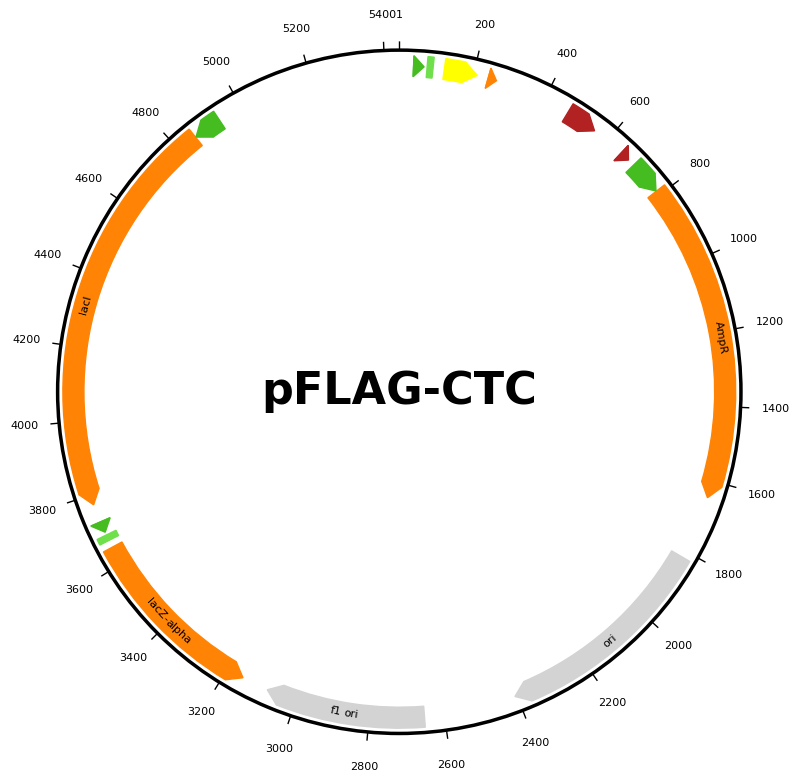

In [59]:
def custom_feature_formatter(feature):
    # AddGene stores the feature label in the '\label' qualifier
    label = feature.qual.get("label")
    if feature.key == "promoter":
        return True, biotite.colors["dimgreen"], "black", label
    elif feature.key == "terminator":
        return True, "firebrick", "black", label
    elif feature.key == "protein_bind":
        return False, biotite.colors["lightgreen"], "black", label
    elif feature.key == "RBS":
        return False, biotite.colors["brightorange"], "black", label
    elif feature.key == "CDS":
        return True, biotite.colors["orange"], "black", label
    elif feature.key == "rep_origin":
        return True, "lightgray", "black", label
    elif feature.key == "primer_bind":
        return True, "blue", "black", label
    elif feature.key == "insertion":
        return True, "yellow", "black", label


fig = plt.figure(figsize=(8.0, 8.0))
ax = fig.add_subplot(111, projection="polar")
graphics.plot_plasmid_map(
    ax,
    annotation,
    plasmid_size=len(seq) + len(insertion),
    label="pFLAG-CTC",
    feature_formatter=custom_feature_formatter,
)
fig.tight_layout()
plt.show()

In [74]:
from Bio import SeqIO
from Bio.SeqFeature import FeatureLocation

def filter_genbank_near_insertion(
    input_file,
    output_file,
    insertion_pos,  # 1-based position
    window_size = 100,
    remove_types = ['primer_bind']):

    record = SeqIO.read(input_file, "genbank")

    insert_pos_0based = insertion_pos - 1

    window_start = max(0, insert_pos_0based - window_size)
    window_end = min(len(record.seq), insert_pos_0based + window_size)
    
    filtered_features = []
    for feature in record.features:
        if feature.type in remove_types:
            continue

        if (feature.location.start <= window_end and 
            feature.location.end >= window_start):
            filtered_features.append(feature)
    
    record.features = filtered_features
    SeqIO.write(record, output_file, "genbank")


filter_genbank_near_insertion("/home/nadzeya/Downloads/pFLAG-CTC.gbk", 
                             "/home/nadzeya/Downloads/pFLAG-CTC_modified_filtered.gbk", 
                             insertion_pos= mcs_start_coord + len(option.start2insertion),
                              window_size=100,
                              remove_types=['primer_bind', 'misc_binding', 'RBS'])

(<Axes: >,
 ({GF(lacI, 3773-4855 (-1)): 0,
   GF(lacIq promoter, 4856-4933 (-1)): 0,
   GF(lac promoter, 3694-3724 (-1)): 0,
   GF(lac operator2, 3670-3686 (-1)): 0,
   GF(lacZ_alpha, 3153-3650 (-1)): 0,
   GF(AmpR, 787-1647 (1)): 0,
   GF(AmpR promoter, 695-786 (1)): 0,
   GF(FLAG, 240-263 (1)): 0,
   GF(lac operator, 75-91 (1)): 0,
   GF(tac promoter, 39-67 (1)): 0,
   GF(ori, 1818-2406 (1)): 0,
   GF(f1 ori, 2653-3081 (1)): 0,
   GF(insertion, 120-210 (1)): 0},
  {GF(AmpR promoter, 695-786 (1)): {'feature_y': 0, 'annotation_y': 1.0},
   GF(insertion, 120-210 (1)): {'feature_y': 0, 'annotation_y': 3.0},
   GF(lacIq promoter, 4856-4933 (-1)): {'feature_y': 0, 'annotation_y': 1.0},
   GF(lac promoter, 3694-3724 (-1)): {'feature_y': 0, 'annotation_y': 2.0},
   GF(tac promoter, 39-67 (1)): {'feature_y': 0, 'annotation_y': 1.0},
   GF(FLAG, 240-263 (1)): {'feature_y': 0, 'annotation_y': 4.0},
   GF(lac operator2, 3670-3686 (-1)): {'feature_y': 0, 'annotation_y': 1.0},
   GF(lac operator, 

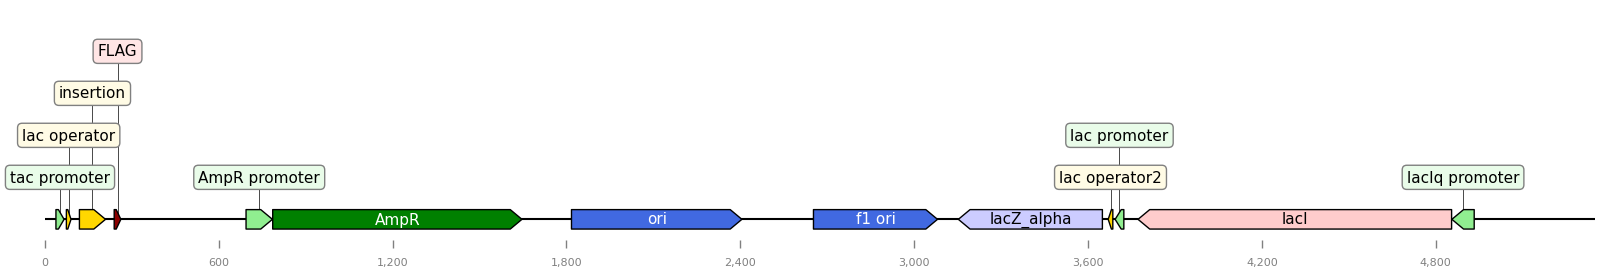

In [85]:
from dna_features_viewer import GraphicFeature, GraphicRecord
features=[
    GraphicFeature(start=3683 + len(insertion), end=4765 + len(insertion), strand=-1, color="#ffcccc", label="lacI"),
    GraphicFeature(start=4766 + len(insertion), end=4843 + len(insertion), strand=-1, color="lightgreen", label="lacIq promoter"),
    GraphicFeature(start=3604 + len(insertion), end=3634 + len(insertion), strand=-1, color="lightgreen", label="lac promoter"),
    GraphicFeature(start=3580 + len(insertion), end=3596 + len(insertion), strand=-1, color="#ffd700", label="lac operator2"),
    GraphicFeature(start=3063 + len(insertion), end=3560 + len(insertion), strand=-1, color="#ccccff", label="lacZ_alpha"),
    GraphicFeature(start=697 + len(insertion), end=1557 + len(insertion), strand=+1, color="green", label="AmpR"),
    GraphicFeature(start=605 + len(insertion), end=696 + len(insertion), strand=+1, color="lightgreen", label="AmpR promoter"),
    GraphicFeature(start=150 + len(insertion), end=173 + len(insertion), strand=+1, color="darkred", label="FLAG"),
    GraphicFeature(start=75, end=91, strand=+1, color="#ffd700", label="lac operator"),
    GraphicFeature(start=39, end=67, strand=+1, color="lightgreen", label="tac promoter"),
    GraphicFeature(start=1728 + len(insertion), end=2316 + len(insertion), strand=+1, color="royalblue", label="ori"),
    GraphicFeature(start=2563 + len(insertion), end=2991 + len(insertion), strand=+1, color="royalblue", label="f1 ori"),
    GraphicFeature(start=mcs_start_coord + len(option.start2insertion), end=mcs_start_coord + len(option.start2insertion) + len(insertion), strand=+1, color="gold", label="insertion")
]
record = GraphicRecord(sequence_length=len(seq), features=features)
record.plot(figure_width=20)

In [17]:
from plasmidcanvas.plasmid import *
from plasmidcanvas.feature import *

In [21]:
plasmid = Plasmid("pFLAG-CTC", 5348 + len(insertion))

In [22]:
lacI_gene = ArrowFeature("lacI", 3683 + len(insertion), 4765 + len(insertion))
plasmid.add_feature(lacI_gene)

lacIq_promoter = ArrowFeature("lacIq promoter", 4766 + len(insertion), 4843 + len(insertion))
plasmid.add_feature(lacIq_promoter)

lac_promoter = ArrowFeature("lac promoter", 3604 + len(insertion), 3634 + len(insertion))
plasmid.add_feature(lac_promoter)

lac_operator2 = ArrowFeature("lac operator", 3580 + len(insertion), 3596 + len(insertion))
plasmid.add_feature(lac_operator2)

lacZ_alpha = ArrowFeature("lacZ_alpha", 3063 + len(insertion), 3560 + len(insertion))
plasmid.add_feature(lacZ_alpha)

AmpR = ArrowFeature("AmpR", 697 + len(insertion), 1557 + len(insertion))
plasmid.add_feature(AmpR)

AmpR_promoter = ArrowFeature("AmpR promoter", 605 + len(insertion), 696 + len(insertion))
plasmid.add_feature(AmpR_promoter)

FLAG = RectangleFeature("FLAG", 150 + len(insertion), 173 + len(insertion))
plasmid.add_feature(FLAG)

lac_operator = ArrowFeature("lac operator", 75, 91)
plasmid.add_feature(lac_operator)

tac_promoter = ArrowFeature("tac promoter", 39, 67)
plasmid.add_feature(tac_promoter)

ori = ArrowFeature("ori", 1728 + len(insertion), 2316 + len(insertion))
plasmid.add_feature(ori)

f1_ori = ArrowFeature("f1 ori", 2563 + len(insertion), 2991 + len(insertion))
plasmid.add_feature(f1_ori)

inserted = ArrowFeature("insertion", mcs_start_coord + len(option.start2insertion), mcs_start_coord + len(option.start2insertion) + len(insertion))
plasmid.add_feature(inserted)

In [26]:
enzyme5 = RestrictionSite(str(option.enzyme5), option.enzyme5.search(seq)[0])
plasmid.add_feature(enzyme5)

enzyme3 = RestrictionSite(str(option.enzyme3), option.enzyme3.search(seq)[0])
plasmid.add_feature(enzyme3)

In [27]:
option.enzyme5.search(seq)

[116]

Plasmid map saved to myplasmid.png


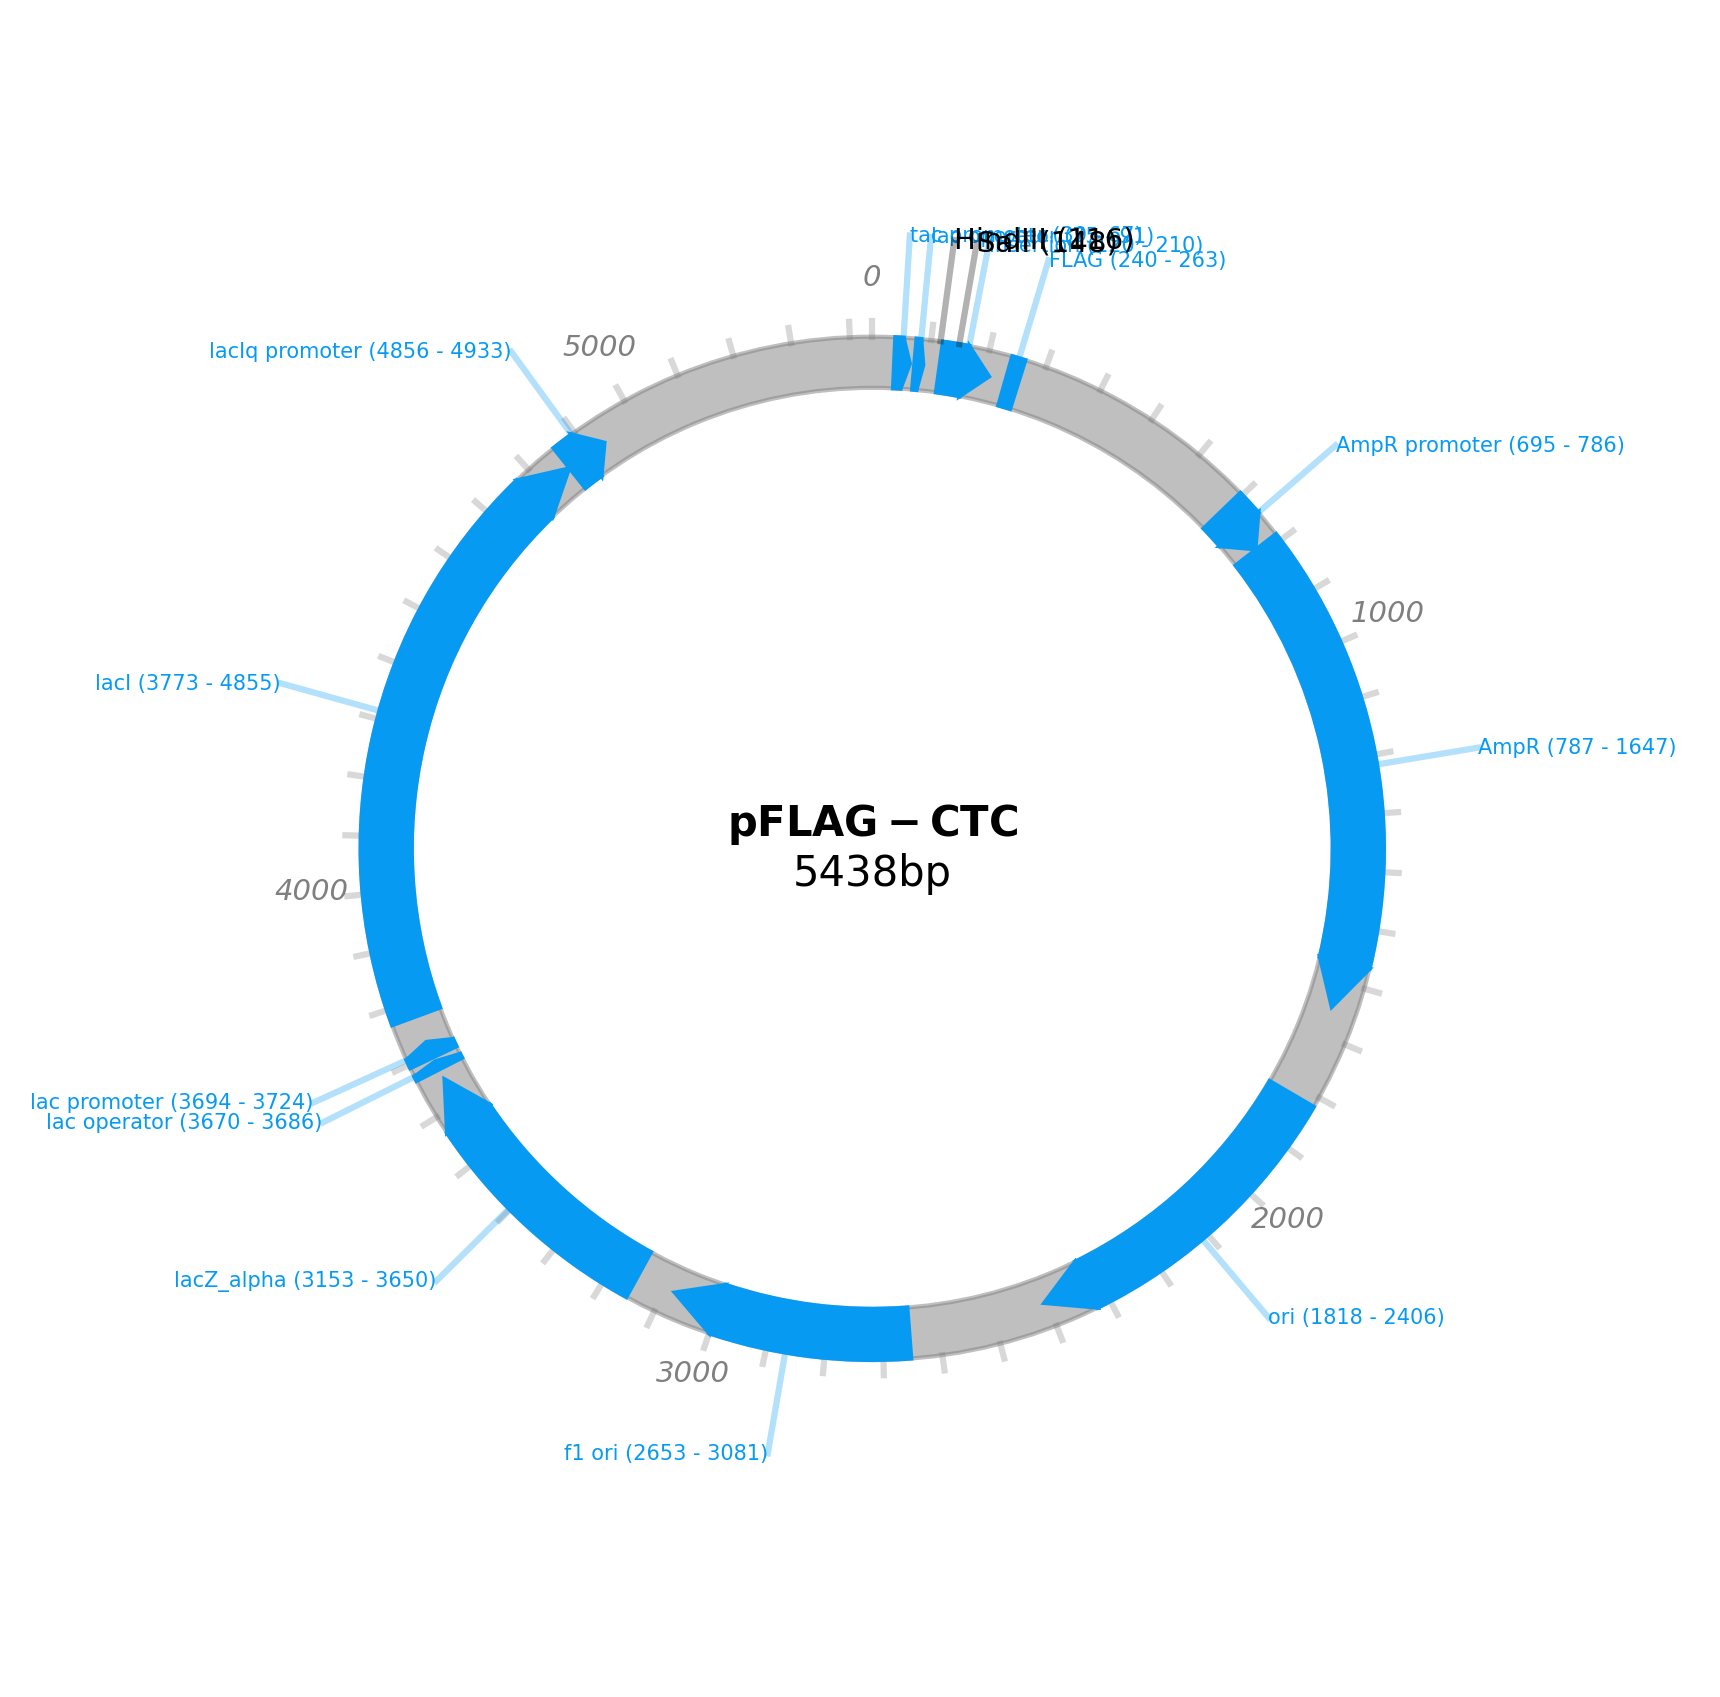

In [29]:
plasmid.set_feature_label_font_size(5)
plasmid.save_to_file("myplasmid.png")